# Determine classes of unlabelled data
Given a dataset without class labels, use KNN to determine classes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Explore data

In [2]:
df = pd.read_csv('KNN_Project_Data.csv')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


### Clean data

In [6]:
# Normalize feature cols
target = 'TARGET CLASS'
feats = [el for el in df.columns if el != target]

# Fit scaler to feats
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[feats])
scaled = scaler.transform(df[feats])
df_feats = pd.DataFrame(scaled, columns=feats)

df_feats.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


### Train model

In [8]:
from sklearn.model_selection import train_test_split
X = df_feats
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Fit model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

# Create predictions
preds = model.predict(X_test)

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, preds))
print('Classification report:\n', classification_report(y_test, preds))

Confusion Matrix:
 [[119  44]
 [ 50 117]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



### Improve model
Find optimal value for "K"

In [32]:
error_rate = []

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    no_match = [pred != actual for pred,actual in zip(preds, y_test)]
    err = np.mean(no_match)
    error_rate.append(err)

c:\Users\611391\Documents\Learning\ML Bootcamp\ml_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

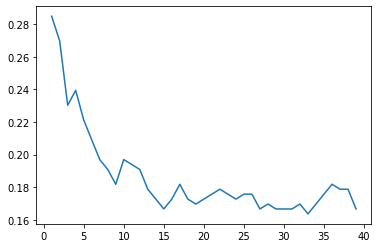

In [33]:
sns.lineplot(range(1,40), error_rate)

### Retrain model
Use k=15 to optimize model

In [34]:
model = KNeighborsClassifier(n_neighbors=15)
# Fit model
model.fit(X_train, y_train)

# Create predictions
preds = model.predict(X_test)

# Evaluate model
print('Confusion Matrix:\n', confusion_matrix(y_test, preds))
print('Classification report:\n', classification_report(y_test, preds))

Confusion Matrix:
 [[138  25]
 [ 30 137]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       163
           1       0.85      0.82      0.83       167

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



By retraining the model, we were able to improve its performance. To further improve, perhaps we subset the classes even further to find the optimal combinations of features to predict the target class.